# Importing Libraries

In [2]:
#installing nlp packages
!pip install nlp

In [2]:
%matplotlib inline

In [3]:
#importing numpy
import numpy as np

In [8]:
#installing tensorflow packages
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=75e69ab97162c1474bb51960b7016485deabc9a49d8f55e23b30471b04e4cc08
  Stored in directory: c:\users\vivobook\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [4]:
#importing tensorflow
import tensorflow as tf

In [5]:
#importing matplolib
import matplotlib.pyplot as plt

In [6]:
#importing random and nlp
import nlp
import random

In [7]:
#to plot the validation accuracy and validation loss of the training dataset after trainig models
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [8]:
#plot the confustion matrix calculted for predictions against teh true outputs   
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


# Importing dataset

In [9]:
#Importing the dataset
data = nlp.load_dataset('emotion')

Using custom data configuration default


In [10]:
#printing the dataset summary
data

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [11]:
#getting the train,test,validation datasets sepeartely
train = data['train']
val=data['validation']
test=data['test']

In [12]:
#defining a function to get tweets
def GetTweet(A):
  #extracting tweets
  tweets = [x['text'] for x in A]
  #extracting labels
  labels = [x['label'] for x in A]
  return tweets,labels

In [13]:
#getting the tweets for train datatset
tweets,labels = GetTweet(train)

In [14]:
#getting the first tweet
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

In [15]:
#getting the tweets for test datatset
tweets,labels = GetTweet(test)
tweets[0],labels[0]

('im feeling rather rotten so im not very ambitious right now', 'sadness')

In [16]:
#getting the tweets for validation datatset
tweets,labels = GetTweet(val)
tweets[0],labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness')

# Tokenization

In [17]:
#importing the token
from  tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
#Tokenizationj is the process of converting  words to numbers
#It will give each unique word a nunique number
#can set limit and ignore less used words
#oov meansd out of vocublary & num_words commonly used words
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

In [19]:
#mapping the tokenization to numeric values
tokenizer.fit_on_texts(tweets)

In [20]:
#numeric tokens for first tweet of train dataset
tokenizer.texts_to_sequences([tweets[0]])

[[15, 8, 128, 263, 4, 227, 16, 55, 21, 189, 1391, 49, 9, 12, 664]]

# Padding & Truncating

In [21]:
#as we need a fixed input shape we have to pad & truncate the generated sequences
#checking lengths of the tweets in the training set
lengths = [len(t.split(' ')) for t in tweets]

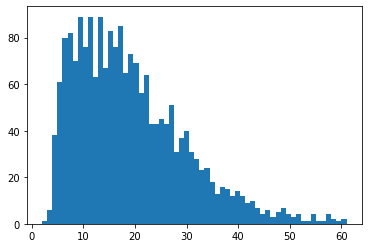

In [22]:
#plot the lengths in histogram, bins is the limit
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [23]:
maxlen = 50

#import padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
#define function to get sequences
#post means ffrom the end
def Getsequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded

In [25]:
#padding for a sequence output will be a vector of 50 elememts
padded_train= Getsequences(tokenizer,tweets)
padded_train[0]

array([  15,    8,  128,  263,    4,  227,   16,   55,   21,  189, 1391,
         49,    9,   12,  664,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

# Preparing labels

In [26]:
#display all the labels
classes = set(labels)
print(classes)

{'fear', 'joy', 'love', 'anger', 'surprise', 'sadness'}


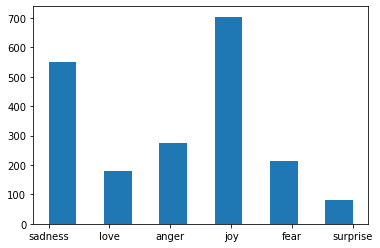

In [27]:
#plot in histogram to see data distribution, bis used to specify the space between bars
plt.hist(labels,bins =11)
plt.show()

In [28]:
#convert classes to corresponding numeric values
class_to_index=dict((c,i) for i,c in enumerate(classes))

#convert index to classes
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [29]:
class_to_index

{'fear': 0, 'joy': 1, 'love': 2, 'anger': 3, 'surprise': 4, 'sadness': 5}

In [30]:
index_to_class

{0: 'fear', 1: 'joy', 2: 'love', 3: 'anger', 4: 'surprise', 5: 'sadness'}

In [31]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [32]:
train_labels=names_to_ids(labels)
print(train_labels[0])

5


# Creating  the model

In [59]:
#creating model
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation='softmax')
        ])

In [60]:
#Compiling the model
model.compile(
   optimizer='adam',
   loss= 'sparse_categorical_crossentropy',
   metrics=['accuracy']
)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [56]:
val_tweets, val_labels = GetTweet(val)
val_seq = Getsequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [57]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 5)

In [46]:
pip install -U ipykernel

  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.4.1
    Uninstalling ipykernel-6.4.1:
      Successfully uninstalled ipykernel-6.4.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
h= model.fit(padded_train,
             train_labels,
             validation_data=(val_seq,val_labels),
             epochs=20,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)])

Epoch 1/20
63/63 [==============================] - 26s 134ms/step - loss: 1.6363 - accuracy: 0.3475 - val_loss: 1.5789 - val_accuracy: 0.3520
Epoch 2/20
63/63 [==============================] - 5s 83ms/step - loss: 1.5706 - accuracy: 0.3520 - val_loss: 1.5451 - val_accuracy: 0.3520
Epoch 3/20
63/63 [==============================] - 5s 79ms/step - loss: 1.4226 - accuracy: 0.4120 - val_loss: 1.1736 - val_accuracy: 0.5765
Epoch 4/20
63/63 [==============================] - 5s 86ms/step - loss: 1.0223 - accuracy: 0.5975 - val_loss: 0.7888 - val_accuracy: 0.6950
Epoch 5/20
63/63 [==============================] - 5s 81ms/step - loss: 0.7090 - accuracy: 0.7355 - val_loss: 0.5939 - val_accuracy: 0.7555
Epoch 6/20
63/63 [==============================] - 5s 80ms/step - loss: 0.5508 - accuracy: 0.7900 - val_loss: 0.4816 - val_accuracy: 0.8000
Epoch 7/20
63/63 [==============================] - 5s 80ms/step - loss: 0.4383 - accuracy: 0.8295 - val_loss: 0.3580 - val_accuracy: 0.8650
Epoch 8/20


# Evaluating the model

In [49]:
show_history(h)

NameError: name 'h' is not defined

In [50]:
test_tweets, test_labels= GetTweet(test)
test_seq = Getsequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_labels)

In [51]:
_= model.evaluate(test_seq,test_labels )

ValueError: in user code:

    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\training.py", line 1473, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\losses.py", line 2369, in get
        return deserialize(identifier)
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\losses.py", line 2324, in deserialize
        return deserialize_keras_object(
    File "C:\Users\VivoBook\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: sparse_categorical_crossentrophy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [52]:
i = random.randint(0,len(test_labels)-1)
print('Sentence:', test_tweets[i])
print('Emotion:',index_to_class[test_labels[i]])

p=model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class= index_to_class[np.argmax(p).astype('uint8')]

print('Predicted emotion :',pred_class)

Sentence: i am now and i still feel the aching loneliness of that quiet hospital room
Emotion: sadness
Predicted emotion : fear


In [53]:
preds=model.predict(test_seq)

In [54]:
show_confusion_matrix(test_labels,preds,list(classes))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets